<a href="https://colab.research.google.com/github/ASBRUC/DSPS_ABruce/blob/main/HW7/AlexBruceHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2:** Read in data

In [113]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2
import ipywidgets as ipw


In [114]:
import os, json
# this mounts your google drive
from google.colab import drive
drive.mount("/content/drive")

# this gets you to your drive folder
%cd drive/MyDrive/

# this makes sure the file is there: this cell should return "kaggle.json"
!ls kaggle.json

# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive
kaggle.json


In [115]:
#!pip install kaggle

In [116]:
import kaggle
# searching for datasets on Kaggle about air quality
!kaggle datasets list -s "World Happiness Report"

#datasets = kaggle.api.dataset_list(search="World Happiness Report")
#print(datasets)

!kaggle datasets download -d jainaru/world-happiness-report-2024-yearly-updated


ref                                                 title                                        size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------  -------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
unsdsn/world-happiness                              World Happiness Report                      37692  2019-11-27 04:41:47.297000         369083       4407  0.85294116       
ajaypalsinghlo/world-happiness-report-2021          World Happiness Report 2021                 56531  2021-03-22 16:51:01.373000          86506       1400  0.9705882        
PromptCloudHQ/world-happiness-report-2019           World Happiness Report 2019                  3629  2019-03-20 09:39:07.397000          25473        414  1.0              
mathurinache/world-happiness-report                 World Happiness Report up to 2022           69046  2022-03-19 10:03:15.76

In [117]:
import zipfile

with zipfile.ZipFile("world-happiness-report-2024-yearly-updated.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()

# reading the contents of the "NetFlix.csv"
happiness = pd.read_csv("World-happiness-report-2024.csv")

# printing first 6 raws of the dataframe
happiness.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [118]:
#Broadcasting out NaN values:
print(len(happiness))
happiness = happiness.dropna()
print(len(happiness))

143
140


**Task 3: For each numerical column X, prepare a column that is a minmax version of X and a version that is the standardized version of X, store them in the same or another dataframe (your choice) as, for example X_minmax and X_standardized (choose the variable or dataframe names you want, but make them meaningful and descriptive!)**

In [119]:
happiness.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,5.644057,5.417700,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.181247,1.165108,1.198051,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.631750,4.762250,4.503750,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.800500,5.911000,5.676500,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.426250,6.515250,6.338250,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [120]:
#Columns that need to be modified 2-12
#minmax = val - min / max - min
#std_val = val - mean / std

#minmax below:
happiness.insert(3, "Ladder minmax", (happiness["Ladder score"] - happiness["Ladder score"].min()) / (happiness["Ladder score"].max() - happiness["Ladder score"].min()), True)
happiness.insert(5, "upperwhisker minmax", (happiness["upperwhisker"] - happiness["upperwhisker"].min()) / (happiness["upperwhisker"].max() - happiness["upperwhisker"].min()), True)
happiness.insert(7, "lowerwhisker minmax", (happiness["lowerwhisker"] - happiness["lowerwhisker"].min()) / (happiness["lowerwhisker"].max() - happiness["lowerwhisker"].min()), True)
happiness.insert(9, "Log GDP minmax", (happiness["Log GDP per capita"] - happiness["Log GDP per capita"].min()) / (happiness["Log GDP per capita"].max() - happiness["Log GDP per capita"].min()), True)
happiness.insert(11, "Social support minmax", (happiness["Social support"] - happiness["Social support"].min()) / (happiness["Social support"].max() - happiness["Social support"].min()), True)
happiness.insert(13, "Healthy life expectancy minmax", (happiness["Healthy life expectancy"] - happiness["Healthy life expectancy"].min()) / (happiness["Healthy life expectancy"].max() - happiness["Healthy life expectancy"].min()), True)
happiness.insert(15, "Freedom to make life choices minmax", (happiness["Freedom to make life choices"] - happiness["Freedom to make life choices"].min()) / (happiness["Freedom to make life choices"].max() - happiness["Freedom to make life choices"].min()), True)
happiness.insert(17, "Generosity minmax", (happiness["Generosity"] - happiness["Generosity"].min()) / (happiness["Generosity"].max() - happiness["Generosity"].min()), True)
happiness.insert(19, "Perceptions of corruption minmax", (happiness["Perceptions of corruption"] - happiness["Perceptions of corruption"].min()) / (happiness["Perceptions of corruption"].max() - happiness["Perceptions of corruption"].min()), True)
happiness.insert(21, "Dystopia + residual minmax", (happiness["Dystopia + residual"] - happiness["Dystopia + residual"].min()) / (happiness["Dystopia + residual"].max() - happiness["Dystopia + residual"].min()), True)

In [121]:
happiness['Dystopia + residual minmax'].describe()

,Dystopia + residual minmax
count,140.000000
mean,0.536931
std,0.175011
min,0.000000
25%,0.449772
50%,0.559264
75%,0.636519
max,1.000000


In [122]:
happiness.describe()

,Ladder score,Ladder minmax,upperwhisker,upperwhisker minmax,lowerwhisker,lowerwhisker minmax,Log GDP per capita,Log GDP minmax,Social support,Social support minmax,Healthy life expectancy,Healthy life expectancy minmax,Freedom to make life choices,Freedom to make life choices minmax,Generosity,Generosity minmax,Perceptions of corruption,Perceptions of corruption minmax,Dystopia + residual,Dystopia + residual minmax
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,0.632873,5.644057,0.640572,5.417700,0.625117,1.378807,0.644001,1.134329,0.701502,0.520886,0.607801,0.620621,0.719144,0.146271,0.364767,0.154121,0.268037,1.575914,0.536931
std,1.181247,0.196220,1.165108,0.192899,1.198051,0.199675,0.425098,0.198551,0.333317,0.206133,0.164923,0.192442,0.162492,0.188287,0.073441,0.183145,0.126238,0.219545,0.537459,0.175011
min,1.721000,0.000000,1.775000,0.000000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000,0.000000
25%,4.631750,0.483513,4.762250,0.494578,4.503750,0.472792,1.077750,0.503386,0.921750,0.570037,0.398000,0.464411,0.527500,0.611240,0.091000,0.226933,0.068750,0.119565,1.308250,0.449772
50%,5.800500,0.677658,5.911000,0.684768,5.676500,0.668250,1.431500,0.668613,1.237500,0.765306,0.549500,0.641190,0.641000,0.742758,0.136500,0.340399,0.120500,0.209565,1.644500,0.559264
75%,6.426250,0.781603,6.515250,0.784810,6.338250,0.778542,1.741500,0.813405,1.383250,0.855442,0.648500,0.756709,0.736000,0.852839,0.192500,0.480050,0.193750,0.336957,1.881750,0.636519
max,7.741000,1.000000,7.815000,1.000000,7.667000,1.000000,2.141000,1.000000,1.617000,1.000000,0.857000,1.000000,0.863000,1.000000,0.401000,1.000000,0.575000,1.000000,2.998000,1.000000


In [123]:
happiness.insert(4, "Ladder std", (happiness["Ladder score"] - happiness["Ladder score"].mean()) / happiness["Ladder score"].std(), True)
happiness.insert(7, "upperwhisker std", (happiness["upperwhisker"] - happiness["upperwhisker"].mean()) / happiness["upperwhisker"].std(), True)
happiness.insert(10, "lowerwhisker std", (happiness["lowerwhisker"] - happiness["lowerwhisker"].mean()) / happiness["lowerwhisker"].std(), True)
happiness.insert(13, "Log GDP std", (happiness["Log GDP per capita"] - happiness["Log GDP per capita"].mean()) / happiness["Log GDP per capita"].std(), True)
happiness.insert(16, "Social support std", (happiness["Social support"] - happiness["Social support"].mean()) / happiness["Social support"].std(), True)
happiness.insert(19, "Healthy life expectancy std", (happiness["Healthy life expectancy"] - happiness["Healthy life expectancy"].mean()) / happiness["Healthy life expectancy"].std(), True)
happiness.insert(22, "Freedom to make life choices std", (happiness["Freedom to make life choices"] - happiness["Freedom to make life choices"].mean()) / happiness["Freedom to make life choices"].std(), True)
happiness.insert(25, "Generosity std", (happiness["Generosity"] - happiness["Generosity"].mean()) / happiness["Generosity"].std(), True)
happiness.insert(28, "Perceptions of corruption std", (happiness["Perceptions of corruption"] - happiness["Perceptions of corruption"].mean()) / happiness["Perceptions of corruption"].std(), True)
happiness.insert(31, "Dystopia + residual std", (happiness["Dystopia + residual"] - happiness["Dystopia + residual"].mean()) / happiness["Dystopia + residual"].std(), True)

In [124]:
happiness.describe()

,Ladder score,Ladder minmax,Ladder std,upperwhisker,upperwhisker minmax,upperwhisker std,lowerwhisker,lowerwhisker minmax,lowerwhisker std,Log GDP per capita,...,Freedom to make life choices std,Generosity,Generosity minmax,Generosity std,Perceptions of corruption,Perceptions of corruption minmax,Perceptions of corruption std,Dystopia + residual,Dystopia + residual minmax,Dystopia + residual std
count,140.000000,140.000000,1.400000e+02,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000,...,1.400000e+02,140.000000,140.000000,1.400000e+02,140.000000,140.000000,1.400000e+02,140.000000,140.000000,1.400000e+02
mean,5.530893,0.632873,-5.075305e-16,5.644057,0.640572,-2.537653e-16,5.417700,0.625117,0.000000,1.378807,...,1.015061e-16,0.146271,0.364767,-1.268826e-16,0.154121,0.268037,2.030122e-16,1.575914,0.536931,-2.030122e-16
std,1.181247,0.196220,1.000000e+00,1.165108,0.192899,1.000000e+00,1.198051,0.199675,1.000000,0.425098,...,1.000000e+00,0.073441,0.183145,1.000000e+00,0.126238,0.219545,1.000000e+00,0.537459,0.175011,1.000000e+00
min,1.721000,0.000000,-3.225315e+00,1.775000,0.000000,-3.320772e+00,1.667000,0.000000,-3.130669,0.000000,...,-3.819401e+00,0.000000,0.000000,-1.991678e+00,0.000000,0.000000,-1.220878e+00,-0.073000,0.000000,-3.067984e+00
25%,4.631750,0.483513,-7.611812e-01,4.762250,0.494578,-7.568461e-01,4.503750,0.472792,-0.762864,1.077750,...,-5.730838e-01,0.091000,0.226933,-7.525933e-01,0.068750,0.119565,-6.762726e-01,1.308250,0.449772,-4.980185e-01
50%,5.800500,0.677658,2.282395e-01,5.911000,0.684768,2.291143e-01,5.676500,0.668250,0.216018,1.431500,...,1.254129e-01,0.136500,0.340399,-1.330509e-01,0.120500,0.209565,-2.663333e-01,1.644500,0.559264,1.276112e-01
75%,6.426250,0.781603,7.579763e-01,6.515250,0.784810,7.477359e-01,6.338250,0.778542,0.768373,1.741500,...,7.100577e-01,0.192500,0.480050,6.294629e-01,0.193750,0.336957,3.139191e-01,1.881750,0.636519,5.690406e-01
max,7.741000,1.000000,1.870995e+00,7.815000,1.000000,1.863298e+00,7.667000,1.000000,1.877466,2.141000,...,1.491636e+00,0.401000,1.000000,3.468465e+00,0.575000,1.000000,3.334004e+00,2.998000,1.000000,2.645945e+00


**Task 4: For each numerical column pair X and Y make a scatter plot of Y vs X with the data as is read in, a scatter plot of Y_minmax vs X_minmax, and a scatter plot of Y_standardized and X_standardized**

We used the seaborn library for the purpose of plotting the many comparisons in a legible and efficent method. This was reccomended by ChatGPT after asking how to make a clean matrix of plots (only using lower half) for comparisons. The code it returned using the seaborn library is below but was edited by us to customize to our data.

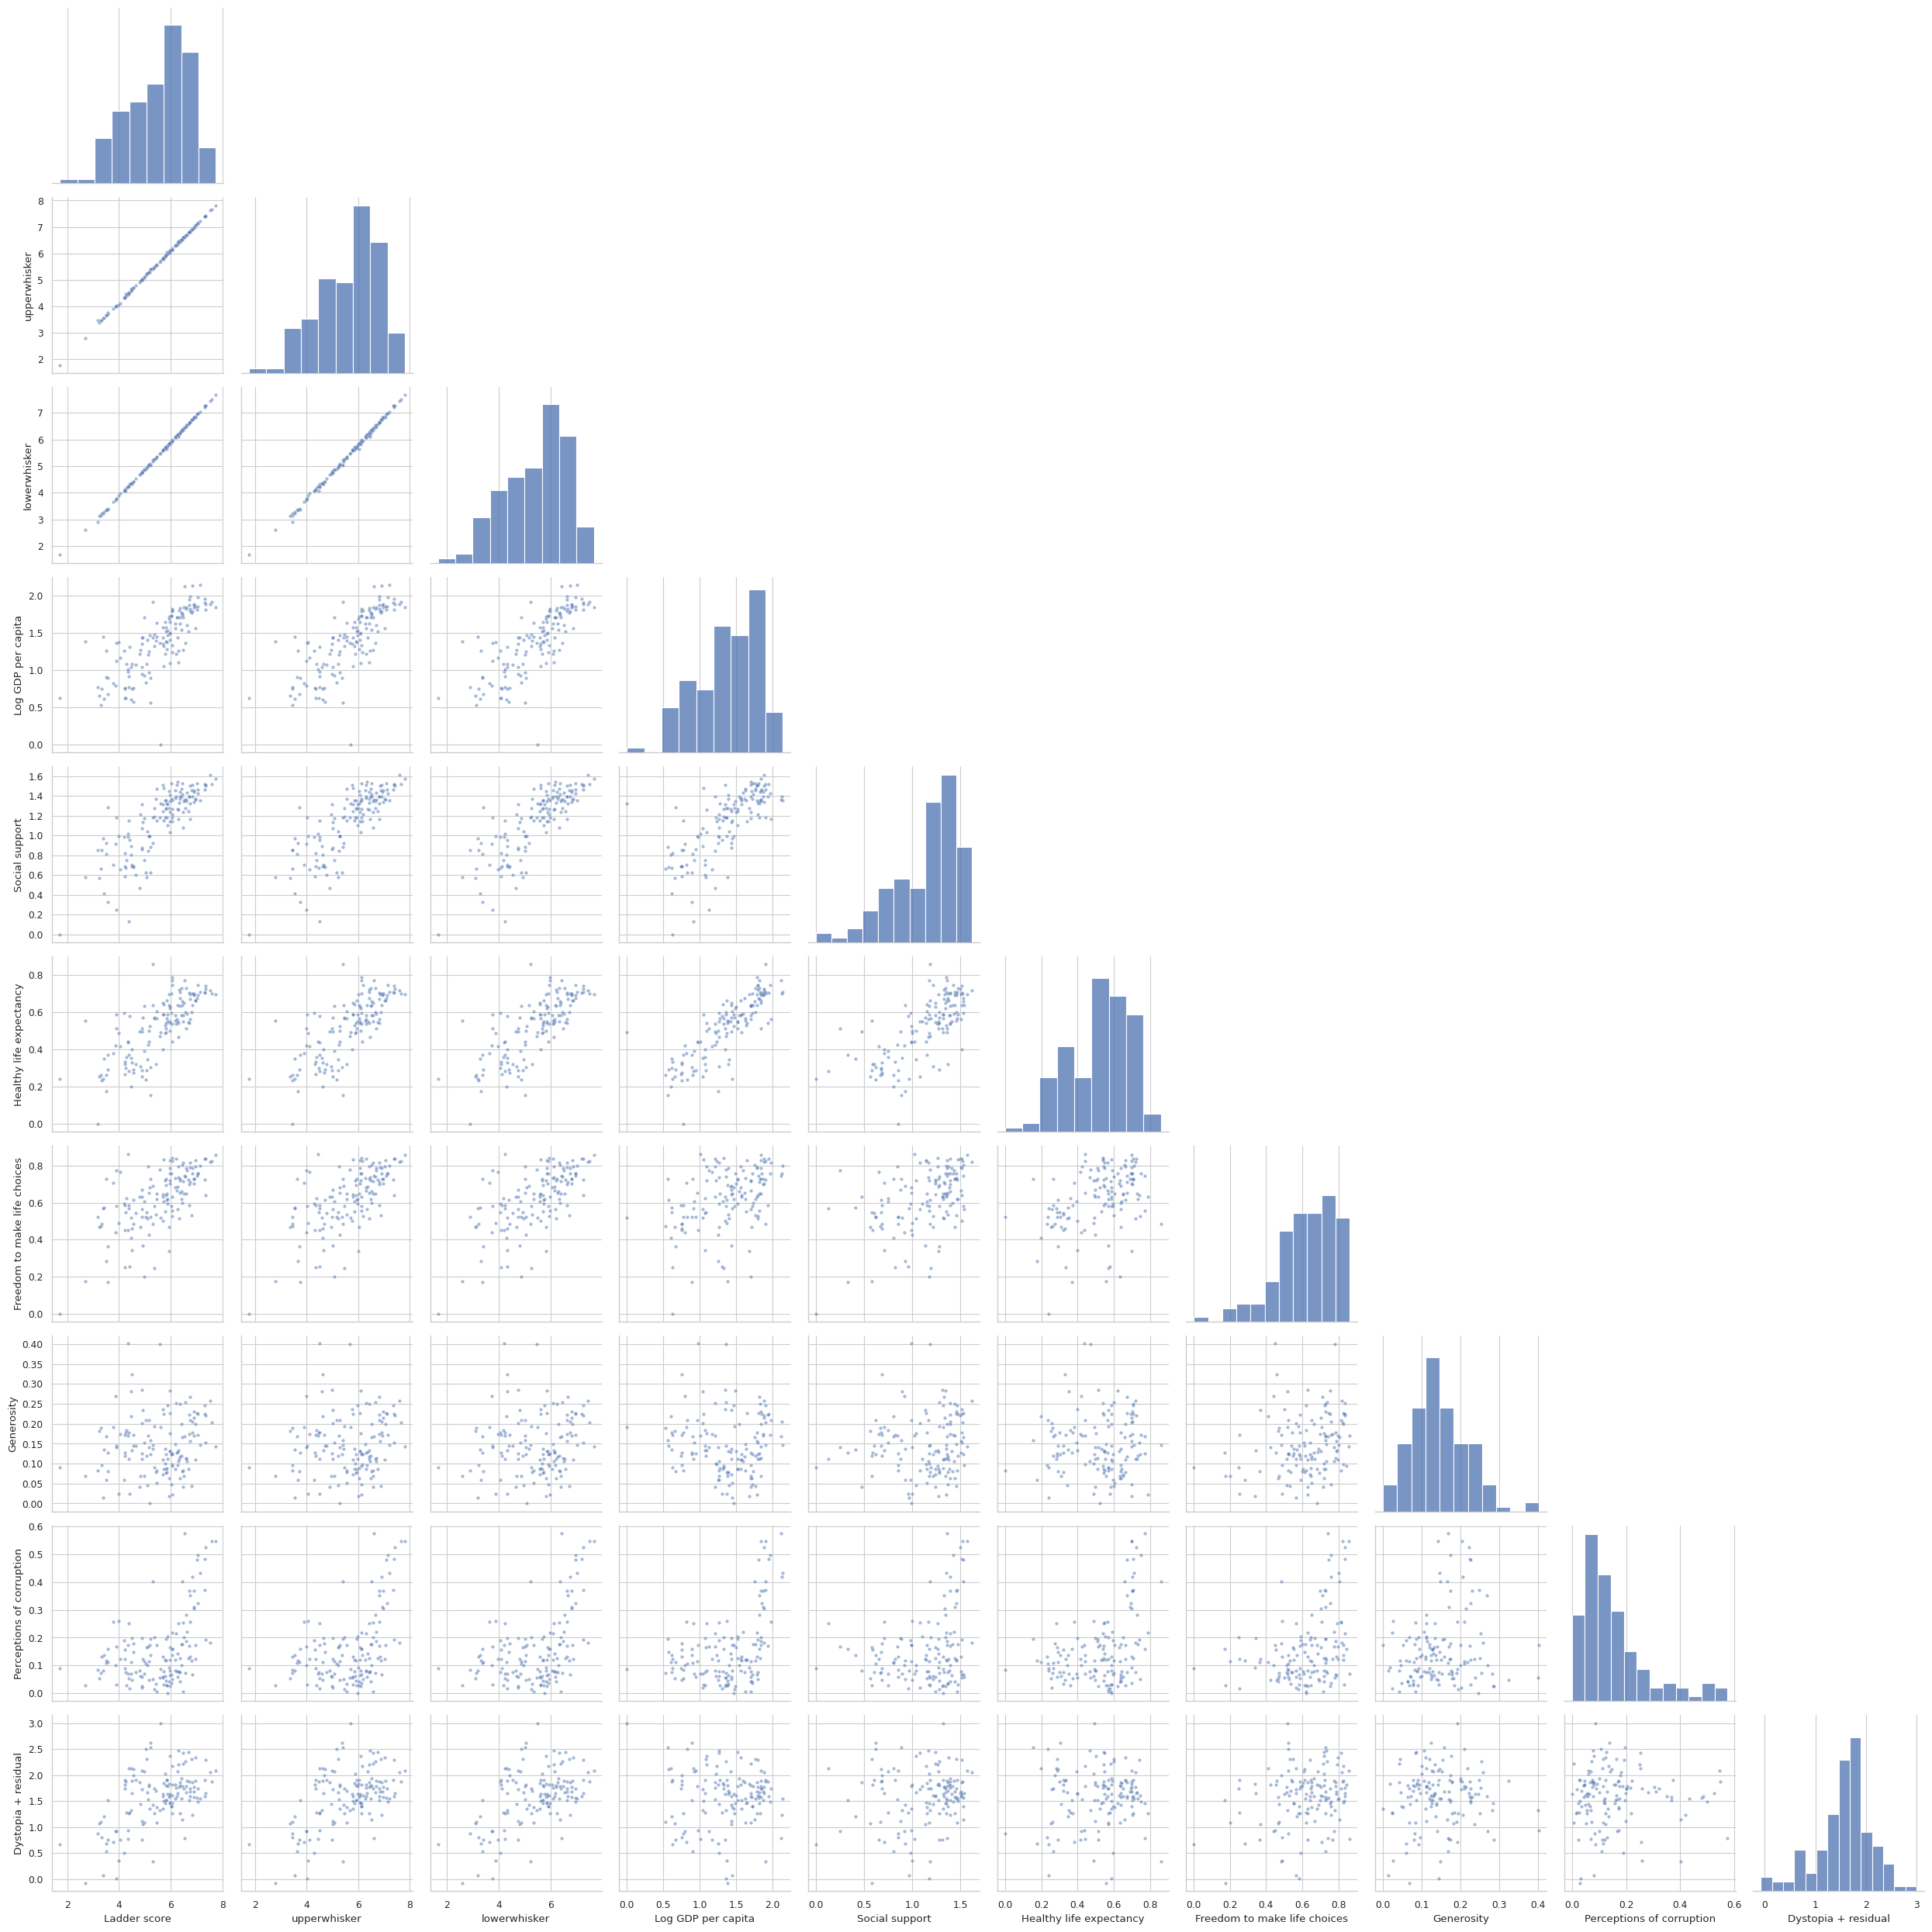

In [125]:
cols = [
    "Ladder score",
    "upperwhisker",
    "lowerwhisker",
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Dystopia + residual"
]
sns.set(style="whitegrid", context="paper")
sns.pairplot(happiness[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.tight_layout()
plt.show()

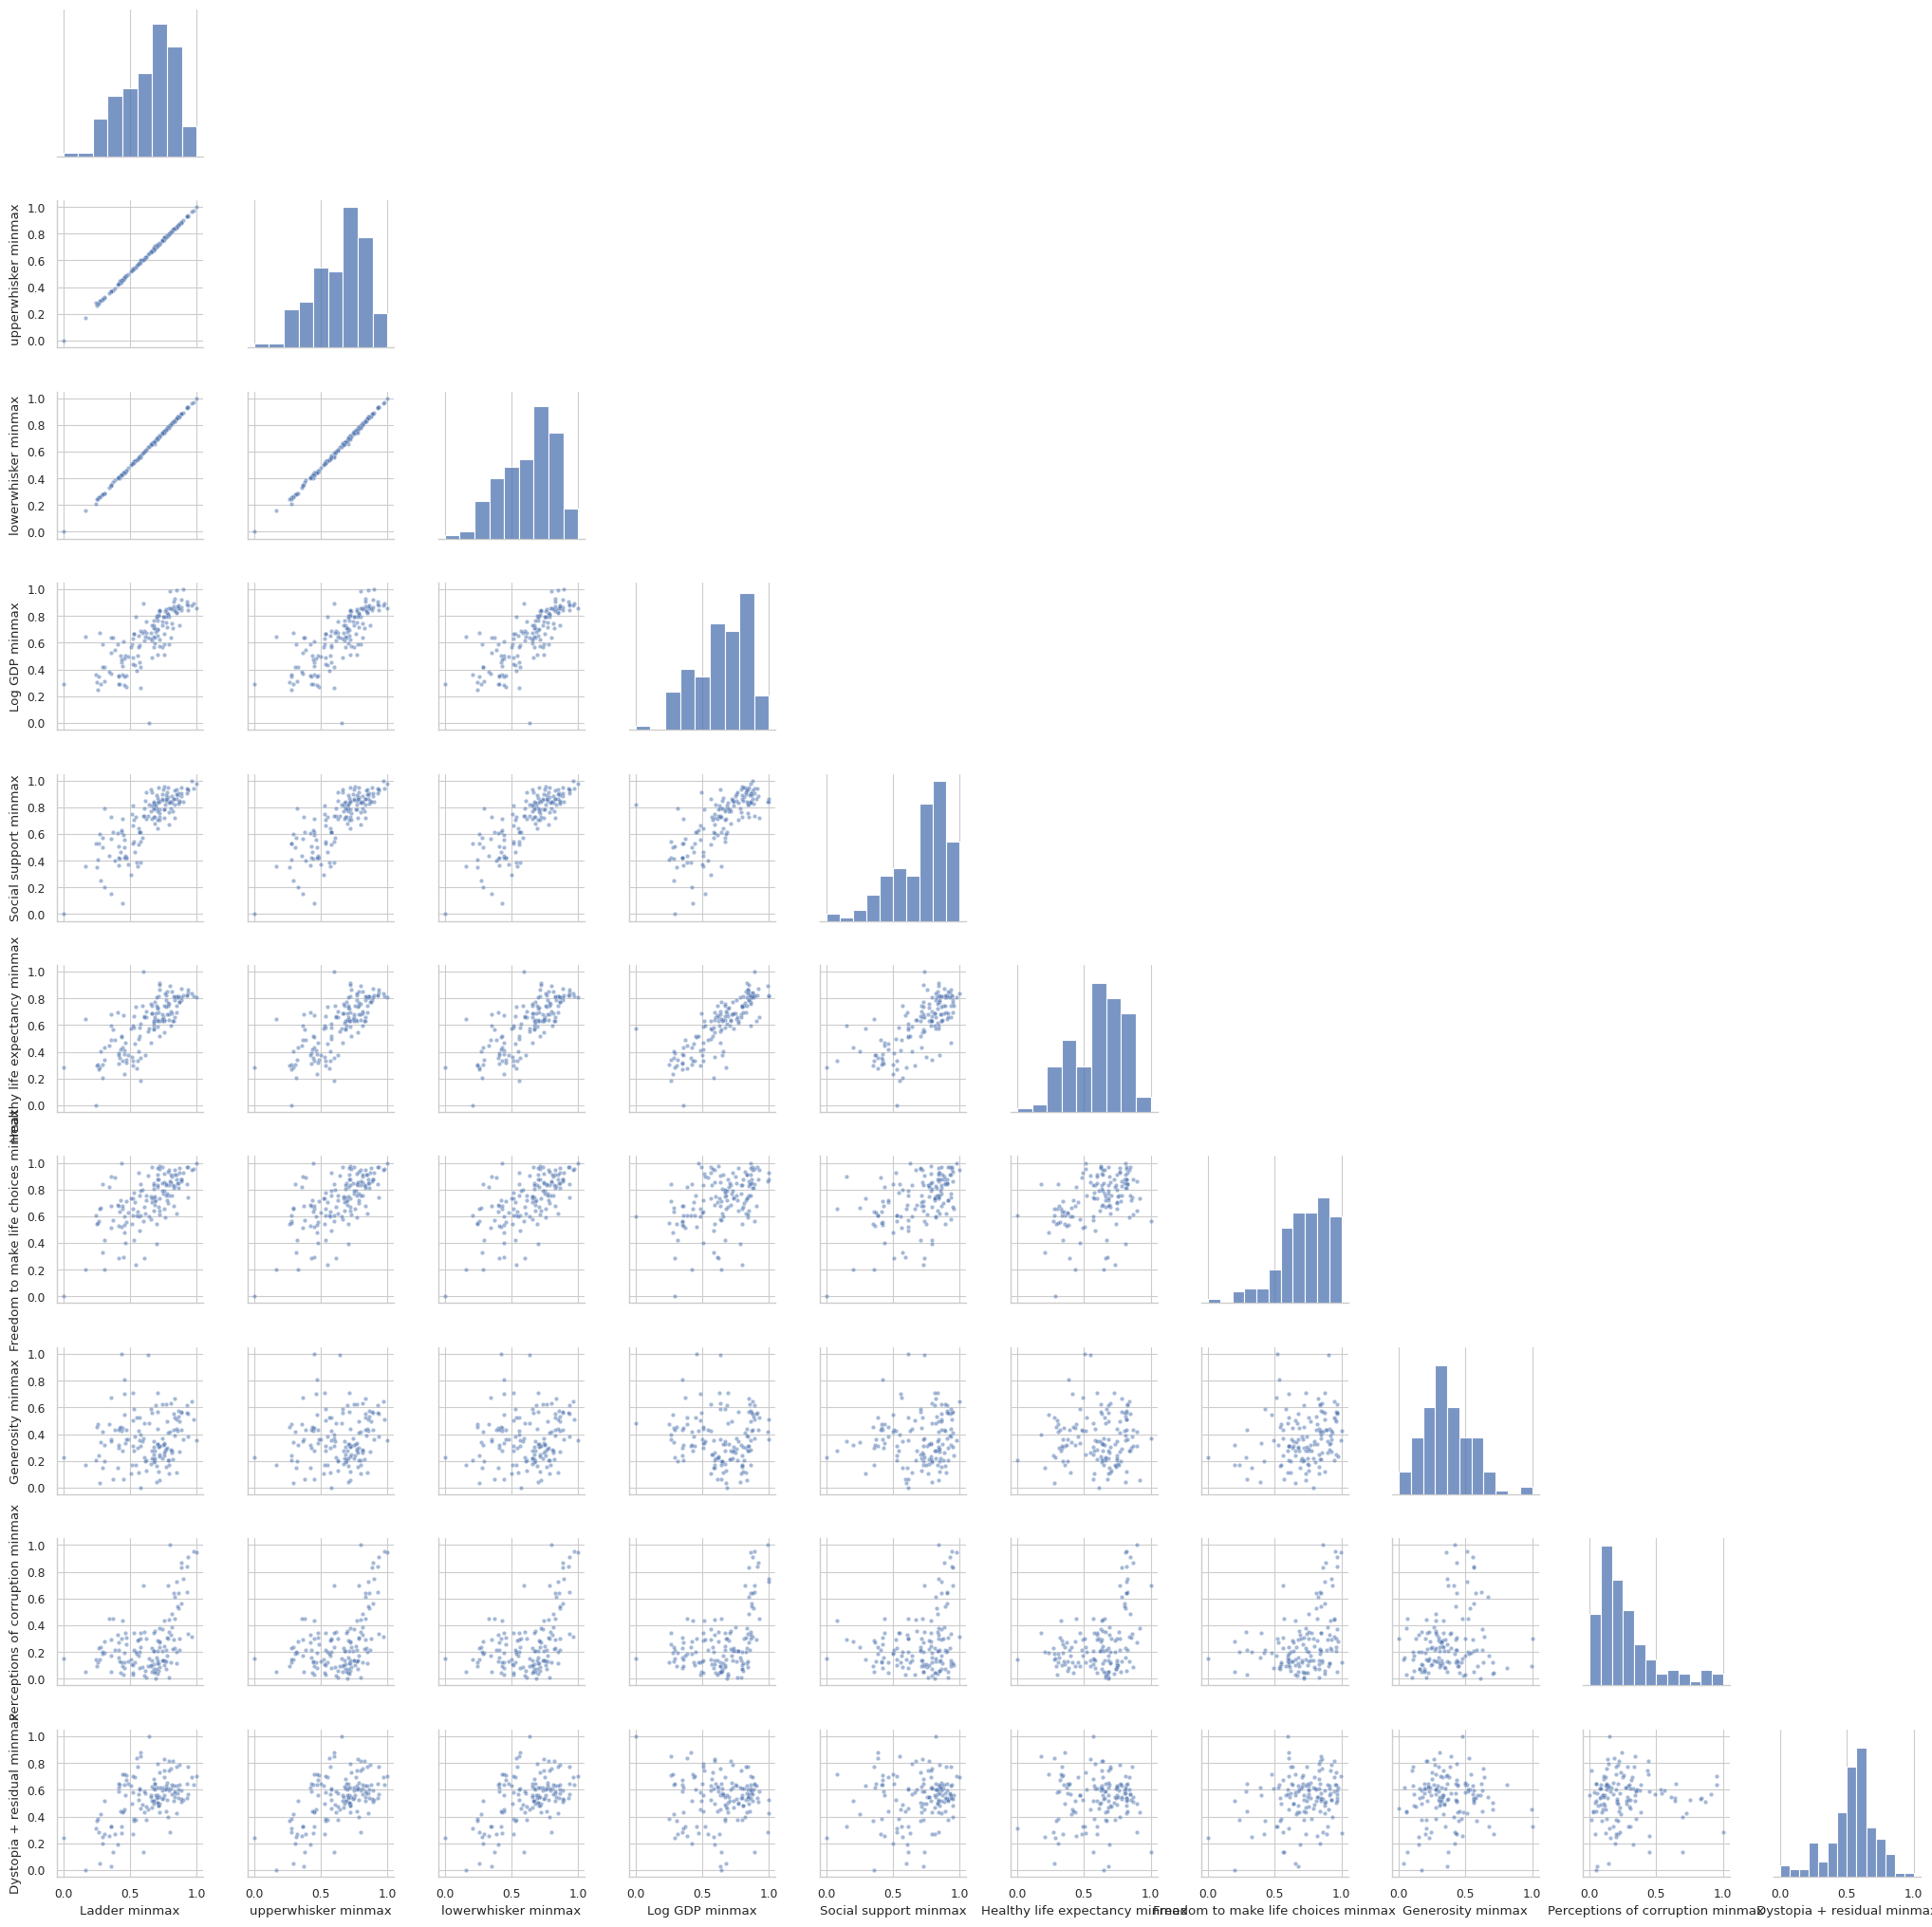

In [126]:
cols = [
    "Ladder minmax",
    "upperwhisker minmax",
    "lowerwhisker minmax",
    "Log GDP minmax",
    "Social support minmax",
    "Healthy life expectancy minmax",
    "Freedom to make life choices minmax",
    "Generosity minmax",
    "Perceptions of corruption minmax",
    "Dystopia + residual minmax"
]
sns.set(style="whitegrid", context="paper")
g = sns.pairplot(happiness[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})
g.fig.subplots_adjust(wspace=0.3, hspace=0.3, bottom=0.2, left=0.2)
plt.show()

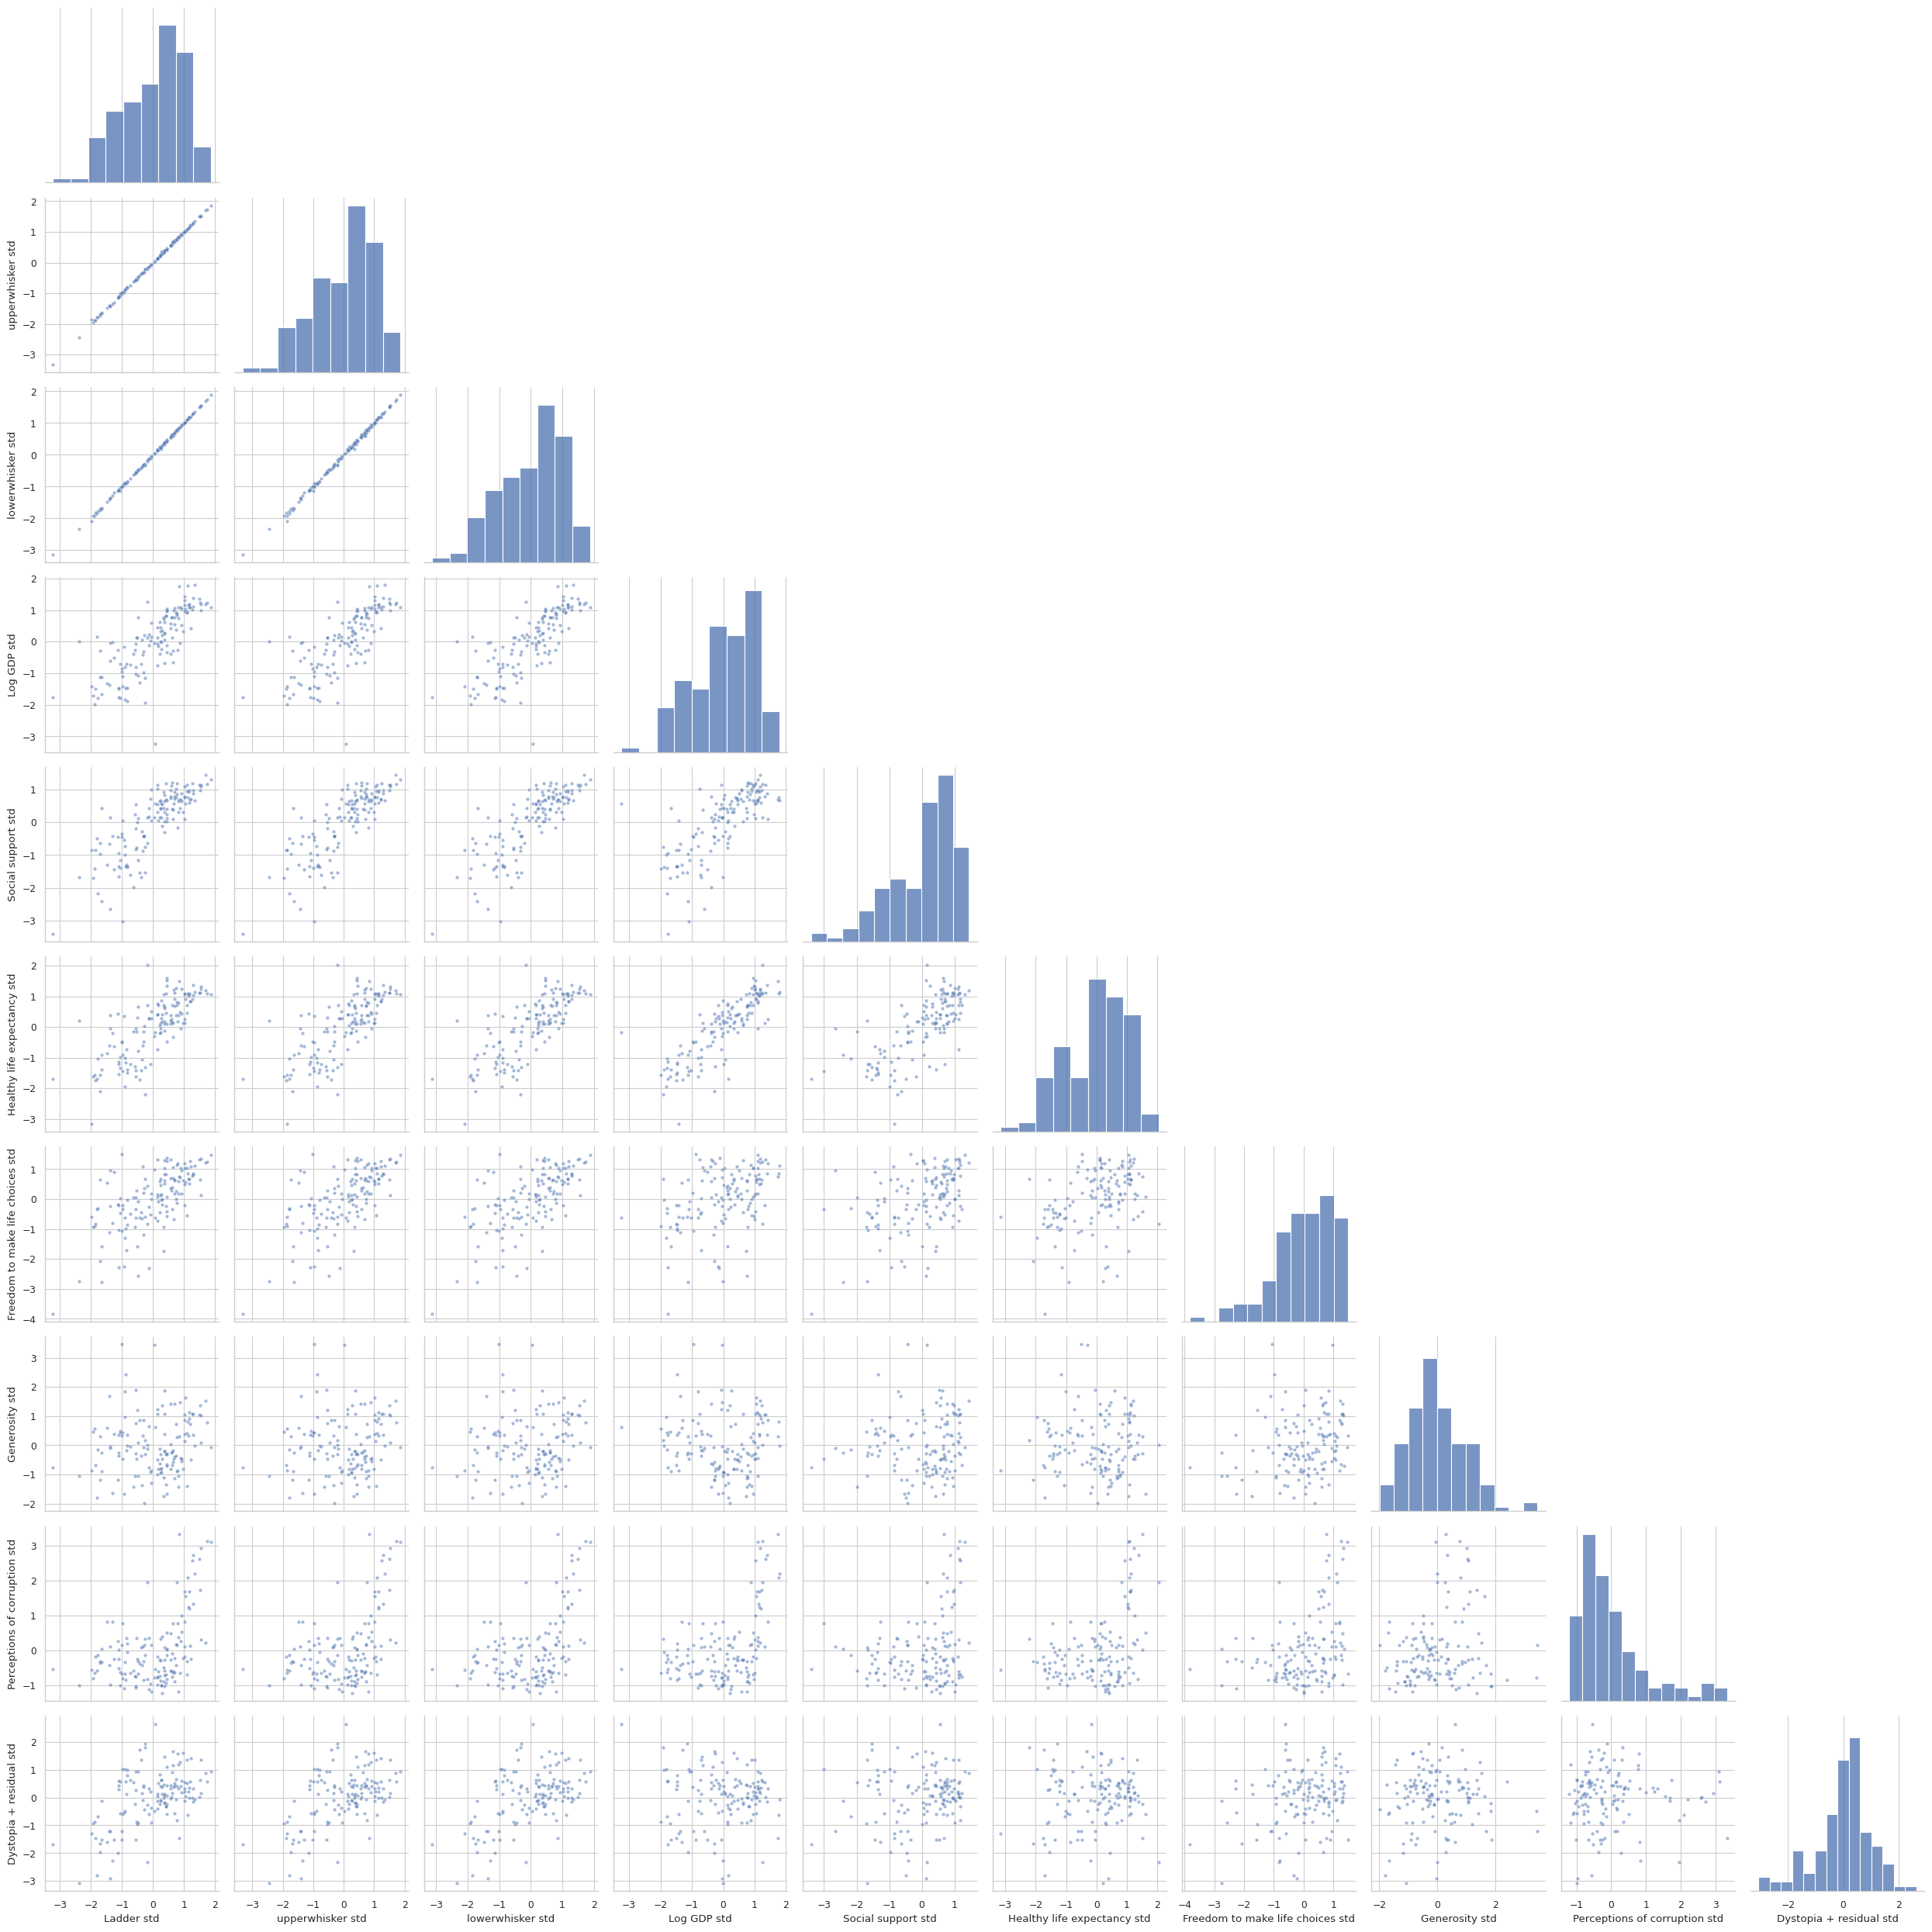

In [127]:
cols = [
    "Ladder std",
    "upperwhisker std",
    "lowerwhisker std",
    "Log GDP std",
    "Social support std",
    "Healthy life expectancy std",
    "Freedom to make life choices std",
    "Generosity std",
    "Perceptions of corruption std",
    "Dystopia + residual std"
]
sns.set(style="whitegrid", context="paper")
sns.pairplot(happiness[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.tight_layout()
plt.show()

In [182]:
np.random.seed(505)

**Task 5: Using KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters**


In [183]:
#print(happiness["Ladder minmax"])
#print(happiness["Generosity minmax"])
#rows_with_nan = happiness[happiness.isna().any(axis=1)]
#print(rows_with_nan)
#61, 87, 102
#happiness.iloc[102]

In [184]:
#kall_temp = happiness[["Ladder minmax", "Generosity minmax"]].to_numpy()
#print(kall_temp)
#clf = sklearn.cluster.KMeans(n_clusters=3, n_init='auto')
#label_temp = clf.fit_predict(kall_temp)

In [185]:
scaled_feats = ["Social support minmax", "Healthy life expectancy minmax", "Freedom to make life choices minmax", "Perceptions of corruption minmax", "Generosity minmax", "Dystopia + residual minmax"]
vs = {}
labels={}
num_feats = range(0, 6)
# 4 loop over N=1 to N=25 clusters
for j, n_f in enumerate(num_feats):
    kall = [[] for y in range(2)]
    kall[0] = happiness["Ladder minmax"]
    kall[1] = happiness[scaled_feats[n_f]]
    kall = np.array(kall).T
    #find the clusters for every N
    clf = sklearn.cluster.KMeans(n_clusters=3, n_init='auto')
    #get the cluster label for every point
    labels[n_f] = clf.fit_predict(kall) #.reshape(100,2)
    #calculate the intercluster variance for the model
    vs[n_f] = (np.sum([np.std(np.array(
        [kall[:,0][labels[n_f]==l], kall[:,1][labels[n_f]==l]]).T - clf.cluster_centers_[l]) \
                      for l in labels[n_f]]))

In [186]:
#NEW CODE
scaled_feats = ["Social support minmax", "Healthy life expectancy minmax", "Freedom to make life choices minmax", "Perceptions of corruption minmax", "Generosity minmax", "Dystopia + residual minmax"]
vs = {}
labels
num_feats = range(0, 6)
# 4 loop over N=1 to N=25 clusters
kall = [[] for y in range(6)]
for j, n_f in enumerate(num_feats):
    kall[n_f] = happiness[scaled_feats[n_f]]
kall = np.array(kall).T
#find the clusters for every N
clf = sklearn.cluster.KMeans(n_clusters=3, n_init='auto')
#get the cluster label for every point
labels = clf.fit_predict(kall) #.reshape(100,2)
#calculate the intercluster variance for the model


In [187]:
labels

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

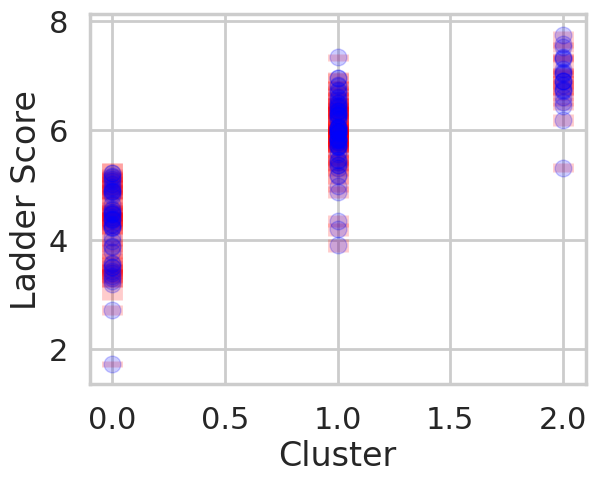

In [188]:
sns.set(style="whitegrid", context="poster")
plt.errorbar(labels, happiness["Ladder score"], yerr=[happiness["upperwhisker"]-happiness["Ladder score"],happiness["Ladder score"]-happiness["lowerwhisker"]], fmt='o', color='blue', alpha=0.2, elinewidth = 15, ecolor = 'red')
plt.xlabel("Cluster")
plt.ylabel("Ladder Score")
plt.show()

In [191]:
vs = {}
labels={}
nclusters = range(2,7)
for j,n_c in enumerate(nclusters):
    #find the clusters for every N
    clf = sklearn.cluster.KMeans(n_clusters=n_c, n_init='auto')
    #get the cluster label for every point
    labels[n_c] = clf.fit_predict(kall) #.reshape(100,2)
    #calculate the intercluster variance for the model
    vs[n_c] = clf.inertia_

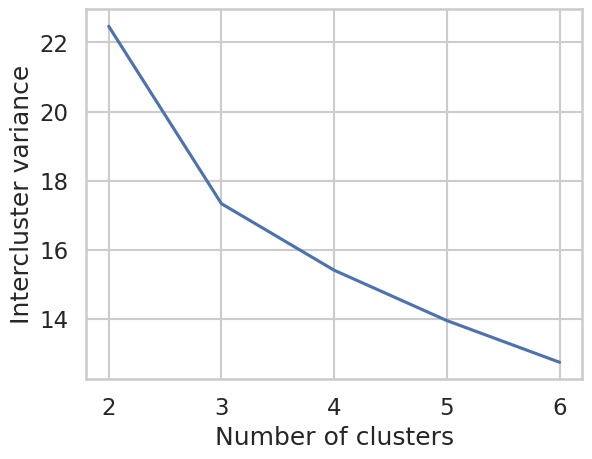

In [193]:
sns.set(style="whitegrid", context="talk")
plt.plot(range(2,7), vs.values())
plt.xlabel("Number of clusters")
plt.ylabel("Intercluster variance")
plt.show()